In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
ds = pd.read_csv("workingData\cars.csv")
ds.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
ds.columns.values

array(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty',
       'state', 'drivetrain', 'price_usd', 'is_exchangeable',
       'location_region', 'number_of_photos', 'up_counter', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'duration_listed'], dtype=object)

In [45]:
ds1 = ds[['odometer_value', 'year_produced', 'engine_fuel', 'engine_capacity','price_usd']]

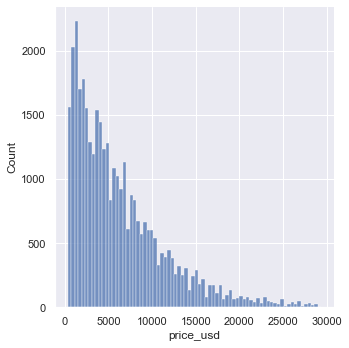

In [61]:
sb.displot(ds1['price_usd'])

In [46]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(np.array(ds1['engine_capacity']).reshape(-1,1))
ds1['engine_capacity'] = si.transform(np.array(ds1['engine_capacity']).reshape(-1,1))

C:\Users\V-VIDY~1\AppData\Local\Temp/ipykernel_6320/3531916598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['engine_capacity'] = si.transform(np.array(ds1['engine_capacity']).reshape(-1,1))


In [64]:
q=ds1['price_usd'].quantile(0.01)
ds1=ds1[ds1['price_usd']>q]
q=ds1['price_usd'].quantile(0.99)
ds1=ds1[ds1['price_usd']<q]


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(np.array(ds['engine_capacity']).reshape(-1, 1))
ds1['engine_capacity'] = imputer.transform(np.array(ds1['engine_capacity']).reshape(-1, 1))

In [69]:
ds1.sort_values('price_usd', ascending=True).head()

,odometer_value,year_produced,engine_fuel,engine_capacity,price_usd
12241,111111,1986,gasoline,2.0,497.96
32769,270000,1995,gasoline,1.3,497.96
4729,272000,1995,gas,1.8,499.00
11800,16000,1997,gasoline,1.6,499.00
8012,222000,1996,gasoline,1.6,499.00


In [67]:
ds1.describe()

,odometer_value,year_produced,engine_capacity,price_usd
count,35405.000000,35405.000000,35405.000000,35405.000000
mean,250842.677814,2003.187855,2.052002,6154.229067
std,113184.066018,7.172026,0.657887,4859.653649
min,1085.000000,1985.000000,0.200000,497.960000
25%,170000.000000,1998.000000,1.600000,2300.000000
50%,250000.000000,2003.000000,2.000000,4850.000000
75%,325000.000000,2009.000000,2.300000,8650.000000
max,650000.000000,2019.000000,7.500000,24250.000000


In [73]:
ds2 = pd.get_dummies(ds1, drop_first=True)

In [74]:
ds1['engine_fuel'].unique()

array(['gasoline', 'gas', 'diesel', 'hybrid-petrol', 'electric',
       'hybrid-diesel'], dtype=object)

In [75]:
ds2.describe()

,odometer_value,year_produced,engine_capacity,price_usd,engine_fuel_electric,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol
count,35405.000000,35405.000000,35405.000000,35405.000000,35405.000000,35405.000000,35405.000000,35405.000000,35405.000000
mean,250842.677814,2003.187855,2.052002,6154.229067,0.000226,0.035616,0.618161,0.000028,0.006327
std,113184.066018,7.172026,0.657887,4859.653649,0.015030,0.185335,0.485844,0.005315,0.079290
min,1085.000000,1985.000000,0.200000,497.960000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170000.000000,1998.000000,1.600000,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250000.000000,2003.000000,2.000000,4850.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,325000.000000,2009.000000,2.300000,8650.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,650000.000000,2019.000000,7.500000,24250.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
x= np.array(ds2[['odometer_value', 'year_produced', 'engine_capacity',
       'engine_fuel_electric', 'engine_fuel_gas', 'engine_fuel_gasoline',
       'engine_fuel_hybrid-diesel', 'engine_fuel_hybrid-petrol']])
y= np.log(np.array(ds2[['price_usd']]))

In [130]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler.fit(xtrain[:,:3])
xtrain[:,:3] = scaler.transform(xtrain[:,:3])
xtest[:,:3] = scaler.transform(xtest[:,:3])

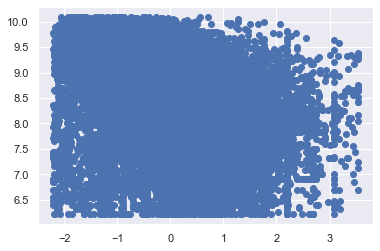

In [132]:
plt.scatter(xtrain[:,0:1],ytrain)

In [133]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)
y_hat=reg.predict(xtrain)

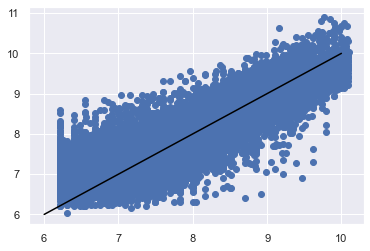

In [142]:
plt.scatter(ytrain,y_hat)
plt.plot([6,10],[6,10], c='black')

In [135]:
reg.coef_

array([[ 0.00523932,  0.74483545,  0.26580986, -0.07285164, -0.23079228,
        -0.205462  ,  1.46020192,  0.05186983]])

In [136]:
reg.intercept_

array([8.52172365])

In [143]:
y_hat_test=reg.predict(xtest)

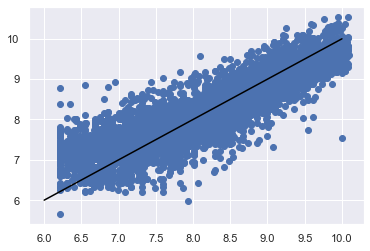

In [144]:
plt.scatter(ytest,y_hat_test)
plt.plot([6,10],[6,10], c='black')

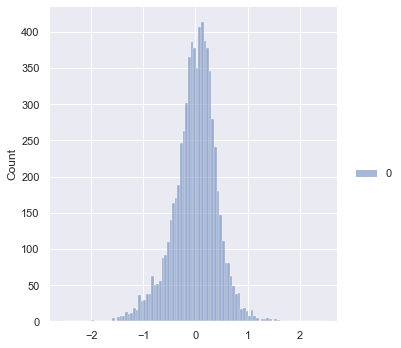

In [145]:
sb.displot(ytest-y_hat_test)

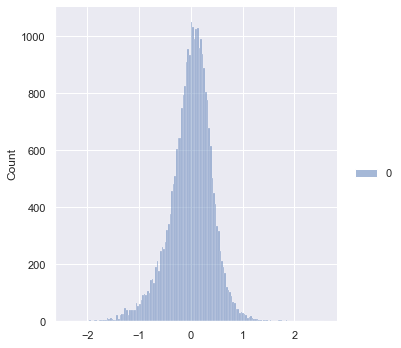

In [146]:
sb.displot(ytrain-y_hat)